<h1 align='center'> COMP2420/COMP6420 - Introduction to Data Management, <br/>Analysis and Security</h1>

<h1 align='center'>Final Exam - Semester 1, 2022</h1>


*****


### Please insert your name and student number in this cell, run the cell (which should be in markdown mode).
### Next: Save, add, commit and PUSH asap. 
### Then: Check through a browser that you can see the edits made to this cell

Name:

Student ID: 

## Instructions

|**Maximum Marks**         |**100 for COMP2420 and 125 for COMP6420 students**
|--------------------------|--------
|  **Weightage**           |  **50%** of the Total Course Grade
|  **Duration**            |  **15 min** Reading + **180 min** Typing
|  **Permitted Material**  |  **Open Book**

### General Instructions
* Before the exam starts, insert your name and student ID in the cell above.  Save the notebook, add, commit and Push your repo immediately to test that this process works and also to minimise issues with Pushing at the end of the exam.
* Check through a browser that your test COMMIT and PUSH worked by checking that your name and student ID appear in the cell in the browser (the cell should be in markdown mode so that you can see it in the browser).
* Remember to start recording your self-invigilation video and to show your student ID (or licence/passport) in the video at the beginning.
* Save, Commit and PUSH your changes frequently, so that you do not lose your work. It is recommended that you do this after attempting each question at least.
* Your final PUSH needs to be *before* the deadline and includes your exam notebook AND your Statement of Originality to be valid.
* Do **not** change the names of the directories or the name of any of the files.

### Code Instructions
* You can import any additional Python modules you may need for your analysis in the first code block. **DO NOT** install any modules other than those present in the Anaconda distribution. 
* For all coding questions please write your code after the comment `YOUR CODE HERE`.
* In the process of testing your code, you can insert more cells or use print statements for debugging, but when submitting your file remember to remove these cells and calls respectively.
* You will be marked on **correctness** and **readability** of your code, if your marker can't understand your code your marks may be deducted. 

### Written Answer Questions
* You will be marked on the **correctness**, **depth** and **clarity** of your written answers. If your marker cannot understand your answer, marks may be deducted.
* Reference your sources where appropriate to avoid plagiarism.
* Avoid long-winded answers and give precise answers. Answers should be clear and legible.

In [58]:
# Important Imports for the question/s
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.preprocessing import LabelEncoder
from scipy import stats
import sqlite3
from sqlite3 import Error
plt.style.use('seaborn-notebook')
## inline figures
%matplotlib inline

# Getting rid of warnings
import warnings
warnings.filterwarnings("ignore")

In [177]:
# Add imports as necessary. 
# You are only allowed to use what is in the standard Anaconda installation
from sklearn.preprocessing import StandardScaler          # Scaling variables
from sklearn.metrics import classification_report
from sklearn import tree


## Question 1: Security 
## _[20 marks for COMP2420, 25 marks for COMP6420]_ (LO7,LO8)
The following questions will cover the topic of Security covered in the lectures and labs. Please provide your written answers in the raw text boxes provided. _Any_ external information you use **must be referenced**. Provide references in the raw textbox and statement of originality.

### Q1.1: Information Security and Diffie-Hellman (DH) Key Exchange

Which aspect of the Information Security Triad does the Diffie-Hellman (DH) key exchange help to preserve? Explain how this preservation is achieved using the DH key exchange.

Note: we are looking here for an logical explanation of how the DH helps preserve your nominated aspect of the Information Security Triad, **not** for a detailed listing of the steps of the DH algorithm.
<span style= 'float: right;'><b>[3 marks]</b></span>

### Q1.2: DH Key Exchange in Action

Alice and Bob decides to use the DH key exchange to help in securing their exchange of information as illustrated in the diagram below.

![DH key exchange diagram'](image/DH_key_exchange_diagram.png)

Given the following information (also depicted in the diagram):

p=31 (a prime number) and g=13 (a generator or primitive root of p).  Alice chooses a secret random number a=12.  Bob chooses a secret random number b=7.

### Q1.2.1) What is the number A that Alice sends to Bob?
### Q1.2.2) What is the number B that Bob sends to Alice?
### Q1.2.3) What is the common secret key K?

**Please explain how you obtained values for A, B and K.**

Note: you can use the code cell below to perform and show the required calculations to find A, B and K.  However, you don't have to use Python to do the calculations but you should still show and explain how you do the calculations in the text box.  Just providing values for A, B and K without providing an explanation will result in no marks being awarded for this question.
<span style= 'float: right;'><b>[5 marks]</b></span>

In [175]:
#code cell for calculations
# ALice:
# Alice chose 12.
a = 12
g = 13
p = 31
A = g**a % p
print("A:",A)


# Bob Chose 7
b = 7
B = g**b % p
print("B:",B)


# Secret Key
K1 = B**a % p
K2 = A**b % p
print(K1, K2)
print(K1==K2)

A: 8
B: 22
2 2
True


### Q1.3: What could go wrong?
The DH key exchange protocol allowed Alice and Bob to securely exchange secret key, or so they thought.  What particular form of attack is the DH key exchange susceptible to?  Briefly explain how the attack works and what can be done to mitigate against it.
<span style= 'float: right;'><b>[3 marks]</b></span>

### Q1.4: Checking that Alice agreed to the terms of a contract
Alice and Bob negotiated a contract for deliverables that Alice needs to agree formally to provide.  They choose to get Alice to sign the contract digitally.  Let’s say that the contract is encapsulated in a message `m` given by the number `34` (`m=34`).  This message needs to be signed by Alice and sent to Bob.  They agree to use RSA as a method of authentication where `p=3, q=11, e=7 and d=3`.

#### Q1.4.1) What is Alice’s private key and public key?

#### Q1.4.2) Given the message `m=34`, what is the signed message `s` that is sent to Bob? (Explain how this was obtained.)
Note: We don't require you to hash the message `m`.

#### Q1.4.3) Demonstrate how Bob would go about verifying the signed message? (Please explain the steps).
<span style= 'float: right;'><b>[5 marks]</b></span>


In [180]:
##code cell to help with calculations if needed
def are_relatively_prime(a, b):
    """Return ``True`` if ``a`` and ``b`` are two relatively prime numbers.

    Two numbers are relatively prime if they share no common factors,
    i.e. there is no integer (except 1) that divides both.
    """
    for n in range(2, min(a, b) + 1):
        if a % n == b % n == 0:
            return False
    return True

def generate_key_pair(p,q):
    
    # TODO: Calculate N = p*q and r = (p-1)(q-1)
    N = p*q 
    r = (p-1)*(q-1) 
    
    e = 7

    d =3 
    
    # return public key and private key pairs.
    public_key = (N,e)
    private_key = (N,d)
    return public_key, private_key

def encrypt(public_key, message):
    # TODO: encrypt the given message with the public key 
    return  pow(message,public_key[1]) % public_key[0]

def decrypt(private_key, message):
    # TODO: retrieve the original message from the encrypted message with your private key 
    return  pow(message,private_key[1]) % private_key[0]

In [183]:
p = 3
q = 11
msg = 34
public_key, private_key = generate_key_pair(p,q)
print ('public key is {}, private key is {}'.format(public_key, private_key) )
print ('message: {}'.format(msg))
print ('encrypted message: {}'.format(encrypt(public_key,msg)))
print ('decrypted message: {}'.format(decrypt(private_key,encrypt(public_key,msg) )))

public key is (33, 7), private key is (33, 3)
message: 34
encrypted message: 1
decrypted message: 1


### Q1.5: Is it really Alice who signed?
How can Alice and Bob go about making sure that Alice’s public key can be trusted to belong to her? Discuss in terms of components of existing infrastructure that Bob and Alice can use.

<span style= 'float: right;'><b>[4 marks]</b></span>

### Q1.6: **(COMP6420 ONLY)** Vulnerabilities
Discuss possible security vulnerabilities with Alice and Bob’s plan above and make suggestions on steps they could take to improve their plan.
<span style= 'float: right;'><b>[5 marks]</b></span>

****
## Q2 - Ethics 
## _[10 Marks for COMP2420, 15 marks for COMP6420]_ (LO6,LO7)
The following questions will cover topics of ethics in data science covered in the lectures and labs. Please provide your written answers in the raw text boxes provided. _Any_ external information you use **must be referenced**. Provide references in the raw textbox and statement of originality.

Consider the following case study:

>In a recent study ([Gichoya et al, 2022](https://www.thelancet.com/journals/landig/article/PIIS2589-7500(22)00063-2/fulltext)), researchers found that standard Artificial Intelligence (AI) deep learning models can be trained to predict patients' racial identity from medical images and show high performance.  This high performance was obtained across multiple image modalities (i.e. different types of medical images like x-rays (area under the receiver operating characteristics curve (AUC) range 0·91–0·99), CT  chest imaging (area under the receiver operating characteristics curve (AUC) range 0·87-0.96) and mammography (area under the receiver operating characteristics curve (AUC) 0.81)).  

>The performance of the prediction model does not seem to rely on obvious confounders.  I.e., other factors that could have an association to race/racial identity, such as body-mass index, disease distribution and breast density, did not help explain the results obtained.  The research also showed that the deep learning models used performed well over all anatomical regions and frequency spectrums of the images, leading the authors to suggest that "the efforts to control this behaviour when it is undesirable will be challenging and demand further study."  

>At this stage, the researchers cannot explain how the AI models can predict racial identity from medical images.  The authors cautioned that the results from their study "emphasise that the ability of AI deep learning models to predict self-reported race is itself not the issue of importance. However, the finding that AI can accurately predict self-reported race, even from corrupted, cropped, and noised medical images, often when clinical experts cannot, creates an enormous risk for all model deployments in medical imaging."  



#### Q2.1: Ethics of using AI in the medical field

Identify and discuss potential social and ethical implications (if any) of the findings described in the given case study.  Please explain your reasoning clearly (including in the case you don't believe there are any social and ethical implications).
<span style= 'float: right;'><b>[2 marks]</b></span>

#### Q2.2: Explainable AI
Given that human experts cannot themselves identify the racial identity of patients from medical images and the AI prediction model developers cannot explain how their models can, should models with such capability be used in healthcare? Please explain why or why not?
<span style= 'float: right;'><b>[2 marks]</b></span>

#### Q2.3: Decision-Making
Increasingly, AI prediction models are being used in healthcare (and many other sectors) to help in making important decisions that have significant impact on people's lives.  Discuss a number of considerations that must be taken into account in interpreting results obtained from such models. 

Note: You may consider factors that influence the performance of AI prediction models.

<span style= 'float: right;'><b>[3 marks]</b></span>

#### Q2.4: Solution?
As a data scientist, how would you approach designing prediction algorithms that are ethical in the context of medical applications? Please outline the design considerations you would make and state any assumptions.

Note: You may want to consider different possible outcomes where racial identity could matter or not matter in making a medical diagnosis and/or providing patient care. For example, in [work by computer scientist Emma Pierson at Cornell](https://news.mit.edu/2022/artificial-intelligence-predicts-patients-race-from-medical-images-0520), it was shown that "algorithms that learn from patients' pain experiences can find new sources of knee pain in X-rays that disproportionately affect Black patients — and are disproportionately missed by radiologists".

You may also want to consider that a good AI prediction model should be able to provide reliable diagnosis outcomes for any patient.

Also remember that "a good data scientist needs to understand the ethical issues surrounding the data they obtain/use, the algorithms they employ, and its impact on people".  ([OpenDS4All](https://github.com/odpi/OpenDS4All))


<span style= 'float: right;'><b>[3 marks]</b></span>

#### Q2.5 **(COMP6420 ONLY)** Consequences
Examine potential consequences that could arise if data scientists aim to remove the ability of the AI systems in the medical field to recognise racial identity versus the case where they did not try to remove this ability.  What do you think is the way to go (removing or not removing the ability to recognise racial identity)? Please provide justifications for your answer.
<span style= 'float: right;'><b>[5 marks]</b></span>

****
## Question 3: Databases & SQL 
## _[20 marks for COMP2420, 25 marks for COMP6420]_ (LO1, LO2, LO3)
The following questions will cover the topics of Databases & SQL covered in the
lectures and labs. Please provide your written answers in the raw text boxes
provided, and code answers in the code boxes provided.
_Any_ external information you use **must be referenced**. Provide references
in the raw textbox or code box as appropriate, and statement of originality.

### Q3.1: Structured Sanity

Consider the following scenario:

> Assume that you have taken a research position at Geoscience Australia. Your first task is to collect satellite, and ocean data for your research on the extent on coastal erosion in Australia and its effects on people, the built environment and infrastructure.

How structured is the data that you are looking to collect? Discuss what data might be present in this process and how it could be structured, if at all. **Clearly state all assumptions.**
<span style= 'float: right;'><b>[3 marks]</b></span>

### Q3.2: Music database

The following question is designed to test your SQL skills. You have been provided a database from a music store.  
Your database looks as follows:

![Music Database ER Diagram](image/q3_database_ER.png)

You will be required to run a number of queries over this database to help gather some insights. You should provide the query, and the output in an appropriate format. You may use the Pandas SQL<>DataFrame functionality, or regular SQLite3 cursor functionality. 

The final answer to each sub-question should be obtained by executing one SQL statement **only**.  No further processing on the result to get the final answer.  Answer can be formatted as raw printed output or a Pandas DataFrame.

In [153]:
# PLEASE KEEP THIS CODE.
# OTHERWISE, YOU WILL NOT BE ABLE TO READ THE DATABASE
def create_connection(db_file):
    """ Connect to the specified SQLite database, if not exist, create a new one (in memory);
    :db_file: location of db to connect to
    :return: Connection object or None
    """
    conn = None
    try:
        conn = sqlite3.connect(db_file)
        print("Connection established!")
    except Error as e:
        print("Error Connecting to Database")
        raise(e)
    return conn

dbfile_nw = "./data/q3.db"
conn = create_connection(dbfile_nw) 
conn.text_factory = lambda b: b.decode(errors = 'ignore')
cur = conn.cursor()
# remember to close the connection when everything is done

Connection established!


#### Q3.2.1: Customer Last Names
Count the numbers of customers whose `LastName` begins with `S`.
<span style= 'float: right;'><b>[3 marks]</b></span>

In [157]:
# YOUR CODE HERE
query = "SELECT COUNT(LastName) FROM customers WHERE SUBSTRING(LastName, 1, 1)='S';"
df_result = pd.read_sql_query(query, conn)
display(df_result)

,COUNT(LastName)
0,8


#### Q3.2.2: Albums by Artists
List all the Album titles for the Artist named `AC/DC`.
<span style= 'float: right;'><b>[3 marks]</b></span>

In [161]:
# YOUR CODE HERE
query = "SELECT Title FROM albums INNER JOIN artists ON albums.ArtistId=artists.ArtistId WHERE artists.Name='AC/DC';"
df_result = pd.read_sql_query(query, conn)
display(df_result)

,Title
0,For Those About To Rock We Salute You
1,Let There Be Rock


#### Q3.2.3: Album sizes
What are the albums that take up more than `1e+10` bytes of space? Order these albums in asending order according to space taken.
<span style= 'float: right;'><b>[4 marks]</b></span>

In [172]:
# YOUR CODE HERE
query = "SELECT * FROM albums INNER JOIN tracks ON albums.AlbumId=tracks.AlbumId WHERE Bytes > 1000000000 ORDER BY Bytes ASC;"
df_result = pd.read_sql_query(query, conn)
display(df_result)

,AlbumId,Title,ArtistId,TrackId,Name,AlbumId,MediaTypeId,GenreId,Composer,Milliseconds,Bytes,UnitPrice
0,227,"Battlestar Galactica, Season 3",147,2820,Occupation / Precipice,227,3,19,None,5286953,1054423946,1.99
1,229,"Lost, Season 3",149,3224,Through a Looking Glass,229,3,21,None,5088838,1059546140,1.99


#### Q3.2.4: Most versatile artist
Find the name of the artist who has tracks covering the most number of distinct `genres`.

Note: We are looking for the artist whose work appears across the most number of genres.
<span style= 'float: right;'><b>[5 marks]</b></span>

In [ ]:
# YOUR CODE HERE


### Q3.3: Reflecting on the Music database schema

#### Q3.3.1 Based on the database schema, comment on the relationship between genres and tracks in this schema and any potential improvements you would make to this design. Justify your answer.
<span style= 'float: right;'><b>[2 marks]</b></span>

#### Q3.3.2 **(COMP6420 ONLY)** Assume you are trying insert details into the database about a track and its artist but the track is not associated with an album. Can this situation be handled using the given database? If not, what changes would you make to the schema to allow it? Justify your answer.

<span style= 'float: right;'><b>[5 marks]</b></span>

****
## Question 4: Data Analysis 
## _[20 marks for COMP2420, 25 marks for COMP6420]_ (LO3,LO4,LO5,LO6)
The following questions will cover the topic of Data Analysis covered in the
lectures and labs. Please provide your written answers in the raw text boxes
provided, and code answers in the code boxes provided.
_Any_ external information you use **must be referenced**. Provide references
in the raw textbox or code box as appropriate, and statement of originality.

The `data/Q4Q5.csv` file captures the details of how CO2 emissions by a vehicle can vary with the different features. The dataset has been taken from Canada Government official open data website. This contains data over a period of 7 years. There are total 7385 rows and 12 columns.

A full description of the dataset is as follows:

| **Name**          | **Description**                                                         |
| ----------------- | ----------------------------------------------------------------------- |
|UniqueID| unique identifer for each of the record in the dataset|
|Vehicle Class | TWO-SEATER, COMPACT ,MID-SIZE, FULL-SIZE, SUV, PICKUP TRUCK|
|Engine Size(L)| the size of the engine |
|Cylinders| number of cylinders |
|Transmission | A = automatic, M = manual|
|Number of Gear |3 - 10 = Number of gears|
|Fuel type | X = regular gasoline|
||Z = premium gasoline|
||D = diesel|
||E = ethanol (E85)|
||N = natural gas|
|Fuel consumption|Fuel Consumption City (L/100 km) = City fuel consumption|
||Fuel Consumption Hwy (L/100 km) = Highway fuel consumption|
||Fuel Consumption Comb (L/100 km) =  the combined fuel consumption (55% city, 45% hwy) |
||Fuel Consumption Comb (mpg) = fuel consumption miles per imperial gallon|
|CO2 Emissions(g/km) | the tailpipe emissions of carbon dioxide (in grams per kilometre) for combined city and highway driving |

### Q4.1: Importing the Data

Import the dataset to a variable `q4q5_df`. Report the number of missing values for each attributes and display the first 5 rows of the dataset along with the column headers.

<span style= 'float: right;'><b>[2 marks]</b></span>

In [126]:
# YOUR CODE HERE
data = pd.read_csv('data/Q4Q5.csv')
print("These columns have nan: ",'\n', data.isna().sum())
data.head()

These columns have nan:  
 UniqueID                              0
Vehicle Class                       497
Engine Size(L)                        0
Cylinders                             0
Transmission                          0
Number of Gear                      295
Fuel Type                             0
Fuel Consumption City (L/100 km)      0
Fuel Consumption Hwy (L/100 km)       0
Fuel Consumption Comb (L/100 km)      0
Fuel Consumption Comb (mpg)           0
CO2 Emissions(g/km)                   0
dtype: int64


,UniqueID,Vehicle Class,Engine Size(L),Cylinders,Transmission,Number of Gear,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,4431257050385092718,COMPACT,2.0,4,A,5.0,Z,9.9,6.7,8.5,33,196
1,7272501878989789175,COMPACT,2.4,4,M,6.0,Z,11.2,7.7,9.6,29,221
2,871771505959663499,COMPACT,1.5,4,A,7.0,Z,6.0,5.8,5.9,48,136
3,6497200756518372995,SUV,3.5,6,A,6.0,Z,12.7,9.1,11.1,25,255
4,7315936316372124351,SUV,3.5,6,A,6.0,Z,12.1,8.7,10.6,27,244


### Q4.2: Better fuel better efficiency

There are five different fuel types available in the dataset. Your tasks are as follows:

 - Use a visualisation to compare the distribution of `Fuel Consumption Comb (L/100 km)` of different `Transmission` for each of the `Fuel Type`. Please justify why you picked the visualisation.
 - Provide a written response of your findings including any interesting patterns in the visualisation.
 
<span style= 'float: right;'><b>[5 marks]</b></span>

In [127]:
data['Fuel Type'].unique()

array(['Z', 'D', 'X', 'E', 'N'], dtype=object)

In [128]:
# Atrtibutes to encode - Transmission, Fuel type, Vehicle class
le = LabelEncoder()
data['Transmission'] = le.fit_transform(data['Transmission'])
data['Fuel Type'] = le.fit_transform(data['Fuel Type'])
data.head()

,UniqueID,Vehicle Class,Engine Size(L),Cylinders,Transmission,Number of Gear,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,4431257050385092718,COMPACT,2.0,4,0,5.0,4,9.9,6.7,8.5,33,196
1,7272501878989789175,COMPACT,2.4,4,1,6.0,4,11.2,7.7,9.6,29,221
2,871771505959663499,COMPACT,1.5,4,0,7.0,4,6.0,5.8,5.9,48,136
3,6497200756518372995,SUV,3.5,6,0,6.0,4,12.7,9.1,11.1,25,255
4,7315936316372124351,SUV,3.5,6,0,6.0,4,12.1,8.7,10.6,27,244


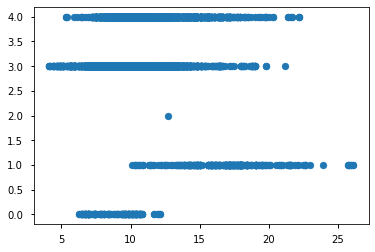

In [191]:
# YOUR CODE HERE
plt.scatter(data['Fuel Consumption Comb (L/100 km)'], data['Fuel Type'])
plt.show()

### Q4.3: Which type of cars consume more gasoline? SUV or full-size car?

Your friend Cheng is thinking about buying a car for commuting. He would like to get either an SUV or a full-size sedan, and due to the current high petrol price, he wants to get the one with better fuel efficiency. To find out more, he has conducted some research online and found the following statement on a webpage: 

    Larger vehicles are notorious for guzzling gas. Since SUVs are heavier, even the most fuel-efficient vehicles in this category will get significantly fewer miles per gallon than sedans. On average, the most fuel-efficient SUVs average around 20-25 MPG, while sedans get anywhere from 30 to 40 MPG. The loss of fuel performance also comes with an increase in fuel cost, meaning more frequent stops at the gas station.

But he's still not very convinced and has come to you, asking if you can use the provided dataset to help him to find out **if the average Fuel Consumption Comb (mpg) of SUV is statistically significantly lower than that of Full-Size**.

You need to state clearly your **null hypothesis**, **alternative hypothesis**, **the conclusion** and also **justify the test you used.**
 
*Hint: A Hypothesis test is an excellent method of comparing group means.*

<span style= 'float: right;'><b>[5 marks]</b></span>

In [134]:
# YOUR CODE HERE
SUV = data['Fuel Consumption Comb (mpg)'][data['Vehicle Class']=='SUV']
fullSize = data['Fuel Consumption Comb (mpg)'][data['Vehicle Class']=='FULL-SIZE']

t, p = stats.ttest_ind(SUV, fullSize)

if p < 0.05:
    print(f'p value is {p}, therefore we reject the null hypothesis')
else:
    print(f'p value is {p}, therefore we fail to reject the null hypothesis')

p value is 0.5334381337913165, therefore we fail to reject the null hypothesis


### Q4.4: Engine Size vs Fuel Consumption


Your tasks are:
 - Use a visualisation to compare the relationship between fuel consumption and engine size for different transmissions. Please justify why you picked the visualisation.
 - Provide a written response on trends and any abnormal findings based on your analysis.

<span style= 'float: right;'><b>[5 marks]</b></span>

In [ ]:
# YOUR CODE HERE


### Q4.5: Find Cluster and visualise it.

#### Q4.5.1 Implement the `KMeans` clustering algorithm with `k = 5` using `sklearn` or equivalent packages. Provide graphical representations of your clustering output and an interpretation of the output.
 
Your tasks are:
 - Implement the KMeans model with `k=5` using `Fuel Consumption Comb (L/100 km)`, `CO2 Emissions(g/km)`, `Engine Size(L)`, and `Cylinders`. 
 - Provide a visualisation to show your clustering output.
 - Discuss insights shown by the output on the underlying data.

*hint: consider reducing the dimensionality when generating the visualisation*

<span style= 'float: right;'><b>[3 marks]</b></span>

In [146]:
data['Vehicle Class'] = le.fit_transform(data['Vehicle Class'])
data.head()

,UniqueID,Vehicle Class,Engine Size(L),Cylinders,Transmission,Number of Gear,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,4431257050385092718,0,2.0,4,0,5.0,4,9.9,6.7,8.5,33,196
1,7272501878989789175,0,2.4,4,1,6.0,4,11.2,7.7,9.6,29,221
2,871771505959663499,0,1.5,4,0,7.0,4,6.0,5.8,5.9,48,136
3,6497200756518372995,4,3.5,6,0,6.0,4,12.7,9.1,11.1,25,255
4,7315936316372124351,4,3.5,6,0,6.0,4,12.1,8.7,10.6,27,244


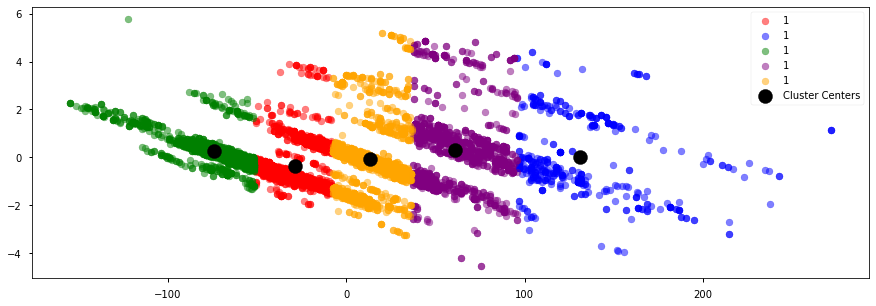

In [147]:
# YOUR CODE HERE
fig = plt.figure(figsize=(15,5))
colors=["red","blue","green","purple","orange"]

pca = PCA(n_components=2)
data_reduced = pd.DataFrame(pca.fit_transform(data[['Fuel Consumption Comb (L/100 km)', 'CO2 Emissions(g/km)', 'Engine Size(L)', 'Cylinders']]))

# KMeans model
kmc_model = KMeans(n_clusters=5, init='k-means++')
kmc_model.fit(data_reduced)

for i in range(np.max(kmc_model.labels_)+1):
    plt.scatter(data_reduced[kmc_model.labels_==i].iloc[:,0], data_reduced[kmc_model.labels_==i].iloc[:,1], label=1, c=colors[i], alpha=0.5)
plt.scatter(kmc_model.cluster_centers_[:,0], kmc_model.cluster_centers_[:,1], label='Cluster Centers', c="black", s=200)
plt.legend()
plt.show()

In [ ]:
data['Vehicle Class'].value_counts()

0    1954
4    1952
2    1186
3     697
1     639
6     497
5     460
Name: Vehicle Class, dtype: int64

In [151]:
k = np.max(kmc_model.labels_)+1
df_clusters = [data[kmc_model.labels_==i] for i in range(k)]

cluster_dict = {
    'Cluster': list(range(k)),
    'Size': [len(df_clusters[i]) for i in range(k)],
    'Most vehicle class in cluster':  [round(df_clusters[i]['Vehicle Class'].mode()) for i in range(k)]
}
pd.DataFrame(cluster_dict)

,Cluster,Size,Most vehicle class in cluster
0,0,2069,0 0 dtype: int32
1,1,442,0 4 dtype: int32
2,2,1493,0 0 dtype: int32
3,3,1440,0 4 dtype: int32
4,4,1941,0 4 dtype: int32


In [149]:
# Vehicle classes - COMPACT, SUV, MID-SIZE, TWO-SEATER, FULL-SIZE, PICKUP TRUCK (0, 1, 2, 3, 4, 5, 6)
for i in range(np.max(kmc_model.labels_)+1):
    print(f'Cluster label {i}:')
    unique, counts = np.unique(data[kmc_model.labels_==i]["Vehicle Class"], return_counts=True)
    print(np.asarray((unique, counts)), "\n")

Cluster label 0:
[[  0   1   2   3   4   5   6]
 [660 132 384   5 630 102 156]] 

Cluster label 1:
[[  0   1   2   3   4   5   6]
 [ 59  48  34  44 108  80  69]] 

Cluster label 2:
[[  0   1   2   4   5   6]
 [617  76 443 155  66 136]] 

Cluster label 3:
[[  0   1   2   3   4   5   6]
 [195 159 133 359 457 105  32]] 

Cluster label 4:
[[  0   1   2   3   4   5   6]
 [423 224 192 289 602 107 104]] 



#### Q4.5.2 **(COMP6420 ONLY)** Comment on the suitability of Kmeans in this context and examine its strengths and/or limitations for this problem and generally.
<span style= 'float: right;'><b>[5 marks]</b></span>

****
## Q5 - Machine Learning 
## _[30 Marks for COMP2420, 35 marks for COMP6420]_ (LO3,LO4,LO5,LO6)
The following questions will cover the topic of Machine Learning covered in the
lectures and labs. Please provide your written answers in the raw text boxes
provided, and code answers in the code boxes provided.
_Any_ external information you use **must be referenced**. Provide references
in the raw textbox or code box as appropriate, and statement of originality.

### Q5.1: Without actually implementing the model, should you use logistic regression or knn to model the below dataset that has 2 features ```x1``` and ```x2```?

<img src="data/q4_1.jpg" width=400 height=400 />

#### Q5.1.1) what train score should a default knn model get and why?
<span style= 'float: right;'><b>[2 marks]</b></span>

#### Q5.1.2) what train score should a default logistic model get and why?
<span style= 'float: right;'><b>[2 marks]</b></span>

### Q5.2: Classification

In this section, we will keep using the car dataset in Question 4. **The task is to predict the `Vehicle Class` of a car.**

#### Q5.2.1: Preprocessing and splitting the dataset

You need to preprocess the dataset first. Things you need to do includes but not limited to:

    1) encode categorical variables to appropriate forms.
    
    2) handle the missing values appropriately if there are any.
    
    3) drop unwanted features if necessary.

    4) split the dataset to train and test sets. You may choose whatever test/train split you wish but be sure to explicitly state what you have chosen.
    
    5) justify each transformation/modification you performed.

<span style= 'float: right;'><b>[8 marks]</b></span>

In [93]:
# YOUR CODE HERE
data = pd.read_csv("data/Q4Q5.csv")
data.head(10)

,UniqueID,Vehicle Class,Engine Size(L),Cylinders,Transmission,Number of Gear,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,4431257050385092718,COMPACT,2.0,4,A,5.0,Z,9.9,6.7,8.5,33,196
1,7272501878989789175,COMPACT,2.4,4,M,6.0,Z,11.2,7.7,9.6,29,221
2,871771505959663499,COMPACT,1.5,4,A,7.0,Z,6.0,5.8,5.9,48,136
3,6497200756518372995,SUV,3.5,6,A,6.0,Z,12.7,9.1,11.1,25,255
4,7315936316372124351,SUV,3.5,6,A,6.0,Z,12.1,8.7,10.6,27,244
5,9004354585794528778,MID-SIZE,3.5,6,A,6.0,Z,11.9,7.7,10.0,28,230
6,6584920238876815891,MID-SIZE,3.5,6,A,6.0,Z,11.8,8.1,10.1,28,232
7,2758529413893964523,MID-SIZE,3.7,6,A,6.0,Z,12.8,9.0,11.1,25,255
8,5078440341669063360,MID-SIZE,3.7,6,M,6.0,Z,13.4,9.5,11.6,24,267
9,6962476287174217737,COMPACT,2.4,4,A,5.0,Z,10.6,7.5,9.2,31,212


In [94]:
# Check for missing values
print("These columns have nan: ", data.columns[data.isna().any()].tolist())
cols = ['Number of Gear']
data[cols] = data[cols].fillna(data.mean().iloc[0])
print("After pre-processing, these columns have Nan: ", data.columns[data.isna().any()].tolist())

These columns have nan:  ['Vehicle Class', 'Number of Gear']
After pre-processing, these columns have Nan:  ['Vehicle Class']


In [95]:
# Atrtibutes to encode - Transmission, Fuel type, Vehicle class
le = LabelEncoder()
data['Transmission'] = le.fit_transform(data['Transmission'])
data['Fuel Type'] = le.fit_transform(data['Fuel Type'])
data['Vehicle Class'] = le.fit_transform(data['Vehicle Class'])
data.head(10)

,UniqueID,Vehicle Class,Engine Size(L),Cylinders,Transmission,Number of Gear,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,4431257050385092718,0,2.0,4,0,5.0,4,9.9,6.7,8.5,33,196
1,7272501878989789175,0,2.4,4,1,6.0,4,11.2,7.7,9.6,29,221
2,871771505959663499,0,1.5,4,0,7.0,4,6.0,5.8,5.9,48,136
3,6497200756518372995,4,3.5,6,0,6.0,4,12.7,9.1,11.1,25,255
4,7315936316372124351,4,3.5,6,0,6.0,4,12.1,8.7,10.6,27,244
5,9004354585794528778,2,3.5,6,0,6.0,4,11.9,7.7,10.0,28,230
6,6584920238876815891,2,3.5,6,0,6.0,4,11.8,8.1,10.1,28,232
7,2758529413893964523,2,3.7,6,0,6.0,4,12.8,9.0,11.1,25,255
8,5078440341669063360,2,3.7,6,1,6.0,4,13.4,9.5,11.6,24,267
9,6962476287174217737,0,2.4,4,0,5.0,4,10.6,7.5,9.2,31,212


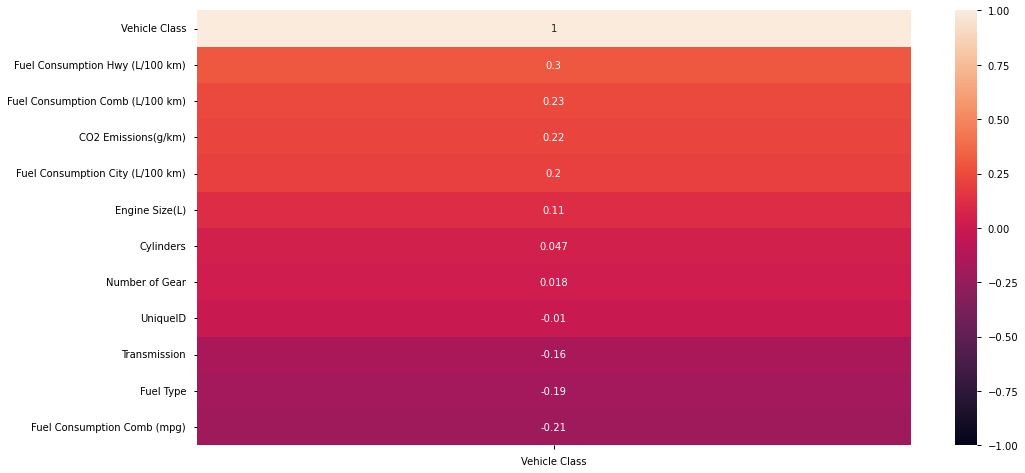

In [96]:
# Using correlation plot to see which features correlatet the most with vehicle class - Code from assignment
def plot_corr_heatmap(data):
    '''
    plot correlation's matrix to explore dependency between features 
    '''
    corr_matrix = data.corr()
    plt.figure(figsize=(16, 8))
    heatmap = sns.heatmap(data.corr()[['Vehicle Class']].sort_values(by='Vehicle Class', ascending=False), vmin=-1, vmax=1, annot=True)
    plt.show()
plot_corr_heatmap(data)
# use all positive correrlation features

In [97]:
data = data.drop(columns=['Fuel Consumption Comb (mpg)', 'Fuel Type', 'Transmission', 'UniqueID'], axis=1)
data.head()

,Vehicle Class,Engine Size(L),Cylinders,Number of Gear,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km)
0,0,2.0,4,5.0,9.9,6.7,8.5,196
1,0,2.4,4,6.0,11.2,7.7,9.6,221
2,0,1.5,4,7.0,6.0,5.8,5.9,136
3,4,3.5,6,6.0,12.7,9.1,11.1,255
4,4,3.5,6,6.0,12.1,8.7,10.6,244


In [98]:
# Scale the dataset
sc = StandardScaler()
data.iloc[:, 1:] = sc.fit_transform(data.iloc[:, 1:])
data.describe()

,Vehicle Class,Engine Size(L),Cylinders,Number of Gear,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km)
count,7385.000000,7.385000e+03,7.385000e+03,7.385000e+03,7.385000e+03,7.385000e+03,7.385000e+03,7.385000e+03
mean,2.463372,7.931668e-17,4.669401e-17,1.628435e-15,-1.540763e-16,1.186518e-17,-1.359178e-16,-9.971054e-17
std,1.928655,1.000068e+00,1.000068e+00,1.000068e+00,1.000068e+00,1.000068e+00,1.000068e+00,1.000068e+00
min,0.000000,-1.669081e+00,-1.430399e+00,-2.039801e-01,-2.387556e+00,-2.266643e+00,-2.377017e+00,-2.642080e+00
25%,0.000000,-8.567210e-01,-8.834076e-01,-2.039801e-01,-7.018593e-01,-6.931179e-01,-7.174441e-01,-7.278351e-01
50%,2.000000,-1.182115e-01,2.105750e-01,-2.039801e-01,-1.304368e-01,-1.536237e-01,-1.296787e-01,-7.835924e-02
75%,4.000000,3.987451e-01,2.105750e-01,-2.039801e-01,5.838414e-01,5.207440e-01,5.618100e-01,6.394825e-01
max,6.000000,3.869740e+00,5.680488e+00,4.902438e+00,5.155222e+00,5.196360e+00,5.229359e+00,4.638887e+00


In [99]:
# Split the dataset
X = data.iloc[:, 1:]      # feature variables
y = data['Vehicle Class'] # target variable

# split and train
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=2420)

print("training shape: ", X_train.shape, y_train.shape)
print("testing shape: ", X_test.shape, y_test.shape)

training shape:  (5908, 7) (5908,)
testing shape:  (1477, 7) (1477,)


#### Q5.2.2: Fit a Decision Tree Model

Now you need to **fit the training data using a decision tree model**.
<span style= 'float: right;'><b>[2 marks]</b></span>

In [100]:
# YOUR CODE HERE
decisionTree = DecisionTreeClassifier()
decisionTreeModel = decisionTree.fit(X_train, y_train)

#### Q5.2.3: Plot the top three nodes of the decision tree and answer the following questions:
1. For each of the nodes, how many samples are there in the node before split?
2. For each of the nodes, what feature and value is the node split on?
3. For the **top node only**, using the plot as a reference, do your own calculation to verify the gini or entropy impurity value shown. (refer to [week 5](https://comp.anu.edu.au/courses/comp2420/lectures/campus_only/2022/W5_1_COMP2420_6420_Decision_Trees__PKJ_.pdf) slide 21)

<span style= 'float: right;'><b>[6 marks]</b></span>

In [178]:
# YOUR CODE HERE
tree.export_graphviz(decisionTreeModel, "tree.dot")

![Tree](image/tree.png)

#### Q5.2.4. Report the overall mean accuracy on the training set and the overall mean accuracy on the testing set.
<span style= 'float: right;'><b>[2 marks]</b></span>

In [102]:
# YOUR CODE HERE
print("Training set score: {:.3f}".format(decisionTree.score(X_train,y_train)))
print("Test set score: {:.3f}".format(decisionTree.score(X_test,y_test)))

Training set score: 0.954
Test set score: 0.739


#### Q5.2.5. Report the accuracy for the target class `MID-SIZE` only using the testing set.
<span style= 'float: right;'><b>[3 marks]</b></span>

In [108]:
# YOUR CODE HERE
y_pred = decisionTreeModel.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.75      0.73       415
           1       0.68      0.69      0.68       127
           2       0.67      0.58      0.62       245
           3       0.87      0.87      0.87       134
           4       0.82      0.84      0.83       369
           5       0.70      0.83      0.76        75
           6       0.61      0.57      0.59       112

    accuracy                           0.74      1477
   macro avg       0.72      0.73      0.73      1477
weighted avg       0.74      0.74      0.74      1477



#### Q5.2.6 Print the confusion matrix, interpret the stengths and weaknesses of the model on the dataset.
<span style= 'float: right;'><b>[5 marks]</b></span>

In [62]:
# YOUR CODE HERE
y_pred = decisionTreeModel.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)


[[309  17  35   0  16  16  22]
 [ 14  90  19   1   2   0   1]
 [ 64  16 139   3  12   5   6]
 [  2   0   1 117  13   1   0]
 [ 19   4   7  13 315   3   8]
 [  7   2   3   1   2  60   0]
 [ 21   1   6   0  16   3  65]]


#### Q5.2.7 **(COMP6420 ONLY)** Is the model overfitting or underfitting? If it is, can you mitigate the issue and achieve better test set performance?
<span style= 'float: right;'><b>[5 marks]</b></span>

****
## IMPORTANT - SUBMISSION CHECKLIST
### Please type YES to this submission question to indicate that you are aware of the following and have completed or will complete the relevant associated tasks by their deadlines:

(1.1) You have ensured that the answers to the Jupyter notebook have been saved before you do your final COMMIT and PUSH for submission to the gitlab server.  

(1.2)Your Jupyter notebook needs to be in an unzipped format with its original naming. do NOT zip up your notebook for submission and do NOT rename it. 

(2) You have filled in and submitted your Statement of Originality by the deadline of the exam.  A late submission of the Statement of Originality will NOT be accepted and will invalidate your exam submission.

(3.1) Your self-invigilation video includes your screen capture showing all open windows you have used on your computer, sound and live web cam showing you clearly.  

(3.2) Your self-invigilation video will be submitted on Wattle by the deadline of 05.00pm Tuesday 07 June 2022 (3 days after the exam is taken). No late submission will be accepted and will constitute a breach of examination conditions.  

(3.3) If you had issues with recording your self-invigilation video then you need to let us know about this by filling in the relevant form available on Wattle.  In this case, you will very likely be called for an oral examination.




### Type your acknowledgement of the submission checklist here to make sure your submission is valid